In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
coffee_score = pd.read_csv('/content/drive/MyDrive/Udacity/coffee.csv')

In [ ]:
coffee_score.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
coffee_score.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

**Clean Data Process**

In [ ]:
# Drop no use columns
coffee_score = coffee_score.drop(columns=['Unnamed: 0'])
coffee_score = coffee_score.drop(columns=['Altitude'])

In [ ]:
# Check na data
coffee_score.isnull().sum()

Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color                     218
Category.T

As we can see the data that is important to analyse which is missing is Processing Method, Variety, Harvest Year, Region , Altitude and Country of Origin

In [ ]:
# 1. Drop na row which is not able to replace 
coffee_score = coffee_score.dropna(subset=['Processing.Method'])

In [ ]:
# 2. Fill Some column with N/A which is no information provide but no need to be drop

coffee_score["Owner"].fillna("N/A", inplace = True) # Owner of the coffee
coffee_score["Farm.Name"].fillna("N/A", inplace = True) # Farm name
coffee_score["Lot.Number"].fillna("N/A", inplace = True) # Lot number which is specific on every owner
coffee_score["Mill"].fillna("N/A", inplace = True) # mill which is specific on every owner
coffee_score["ICO.Number"].fillna("N/A", inplace = True) # some coffe don't have ICO (International Coffee Organization) register number
coffee_score["Company"].fillna("N/A", inplace = True)
coffee_score["Producer"].fillna("N/A", inplace = True)
coffee_score["Owner.1"].fillna("N/A", inplace = True)
coffee_score["Region"].fillna("N/A", inplace = True)

In [ ]:
# 3. Clean some data that can replace with specific data
# 3.1 Altitude
coffee_score['altitude_low_meters'] = coffee_score['altitude_low_meters'].fillna((coffee_score['altitude_low_meters'].mean()))
coffee_score['altitude_high_meters'] = coffee_score['altitude_high_meters'].fillna((coffee_score['altitude_high_meters'].mean()))
coffee_score['altitude_mean_meters'] = coffee_score['altitude_mean_meters'].fillna((coffee_score['altitude_mean_meters'].mean()))

# 3.2 Color 
coffee_score["Color"].fillna("Green", inplace = True)
coffee_score["Quakers"].fillna(0, inplace = True)

In [ ]:
# 3.3 Harvest Year
coffee_score['Harvest.Year'].value_counts()
# Harvest year is vary between 2012 to 2018 but the data is collect 2018 so we assume this crops harvest 1-2 year on collect
# coffee_score['Harvest.Year'].fillna(method='ffill')

2012           353
2014           227
2013           174
2015           126
2016            98
2017            67
2013/2014       29
2015/2016       28
2017 / 2018     19
2014/2015       19
2011            15
2016 / 2017      4
2011/2012        2
2018             1
Name: Harvest.Year, dtype: int64

In [ ]:
coffee_score['Harvest.Year'].fillna(method='ffill', inplace = True)
# we use ffill: propagate last valid observation forward to next valid because the data has bee sort year from the original source

In [ ]:
# clean year data to be finish year of range year
coffee_score['Harvest.Year'].replace('2013/2014', '2014', inplace = True)
coffee_score['Harvest.Year'].replace('2015/2016', '2016', inplace = True)
coffee_score['Harvest.Year'].replace('2017 / 2018', '2018', inplace = True)
coffee_score['Harvest.Year'].replace('2014/2015', '2015', inplace = True)
coffee_score['Harvest.Year'].replace('2016 / 2017', '2017', inplace = True)
coffee_score['Harvest.Year'].replace('2011/2012', '2012', inplace = True)

In [ ]:
coffee_score['Variety'].value_counts()

Caturra                  249
Bourbon                  223
Typica                   208
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            32
Mundo Novo                31
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   7
Arusha                     6
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Ethiopian Yirgacheffe      2
Java                       2
Moka Peaberry              1
Peaberry                   1
Ethiopian Heirlooms        1
Sumatra Lintong            1
Sulawesi                   1
Marigojipe                 1
Blue Mountain              1
Pache Comun                1
Name: Variety, dtype: int64

In [ ]:
# 3.4 Variety
# We can see from value that if we don't know we can replace it with Other to be more open
coffee_score['Variety'].fillna('Other', inplace = True)

In [ ]:
coffee_score.isnull().sum()
# now we have no na left in our data

Analyse Data

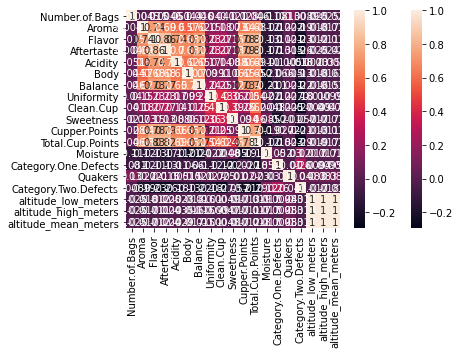

In [ ]:
heat = coffee_score.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.show()

In [ ]:
coffee_score['Species'].value_counts()
# low data on robusta so we check the correlation to our goal (Total Cup Points)

Arabica    1159
Robusta      10
Name: Species, dtype: int64

In [ ]:
column_1 = coffee_score["Species"].replace({'Arabica': 0, 'Robusta': 1})
column_2 = coffee_score["Total.Cup.Points"]
correlation = column_1.corr(column_2)
correlation

-0.08138812402556345

In [ ]:
# So we can drop Robusta because it to low on data and no relate too much
araica_coffee = coffee_score[coffee_score['Species'] == 'Arabica']
araica_coffee = araica_coffee.drop(columns=['Species'])
araica_coffee

In [ ]:
araica_coffee['Country.of.Origin'].value_counts()

Mexico                          229
Guatemala                       173
Colombia                        148
Brazil                          118
Taiwan                           70
Honduras                         49
Costa Rica                       49
United States (Hawaii)           49
Tanzania, United Republic Of     39
Uganda                           26
Ethiopia                         25
Kenya                            24
Thailand                         21
Nicaragua                        18
Indonesia                        17
El Salvador                      17
China                            16
Malawi                           11
United States                     8
Peru                              8
Myanmar                           8
Vietnam                           7
Haiti                             5
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Laos                              3
Japan                       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


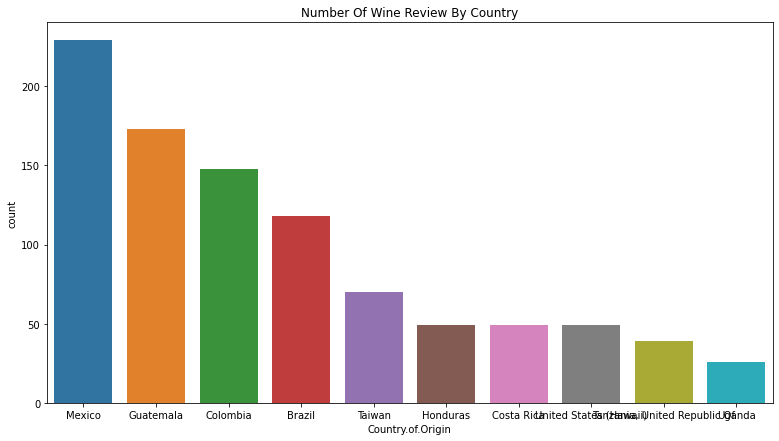

In [ ]:
# See Country.of.Origin data
plt.subplots(figsize=(13,7))
sns.countplot('Country.of.Origin',data=araica_coffee,order=araica_coffee['Country.of.Origin'].value_counts().head(10).index)
plt.title('Number Of Wine Review By Country')
plt.show()

Most of the review coffee is Maxico and most of them are from america region

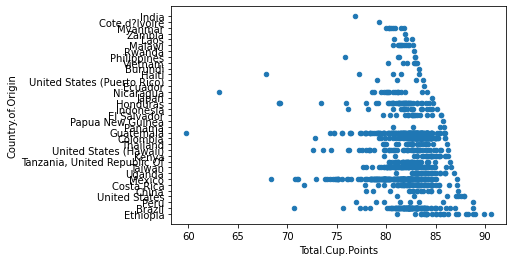

In [ ]:
araica_coffee.plot.scatter(y='Country.of.Origin', x='Total.Cup.Points')
plt.show()

Text(0.5, 0, '')

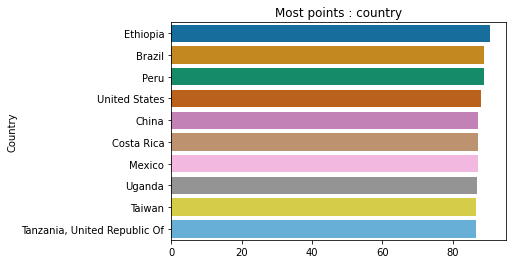

In [ ]:
grouping_cp = araica_coffee.groupby(['Country.of.Origin'])['Total.Cup.Points'].max().sort_values(ascending=False).to_frame()[:10]
expensive_plot = sns.barplot(x = grouping_cp['Total.Cup.Points'], y = grouping_cp.index, palette= 'colorblind')
expensive_plot.set_title('Most points : country')
expensive_plot.set_ylabel('Country')
expensive_plot.set_xlabel('')

Ethiopia is the country that contain good coffee that higher total cup points

In [ ]:
grouping_cp_mean = araica_coffee.groupby(['Country.of.Origin'])['Total.Cup.Points'].mean().sort_values(ascending=False).to_frame()[:10]
grouping_cp_mean

,Total.Cup.Points
Country.of.Origin,
United States,85.978750
Papua New Guinea,85.750000
Ethiopia,85.749200
Japan,84.670000
Kenya,84.284167
Uganda,84.051923
Ecuador,83.830000
Panama,83.707500
Burundi,83.330000


Answer Question 1 Ethiopia is the best country to choose bean for roasting  because most of them is higher score and then USA which is the best mean score and can conclude that we better choose coffee bean from north america or south america 

In [ ]:
araica_coffee['Acidity'].describe()

count    1159.000000
mean        7.529154
std         0.312194
min         5.250000
25%         7.330000
50%         7.500000
75%         7.750000
max         8.750000
Name: Acidity, dtype: float64

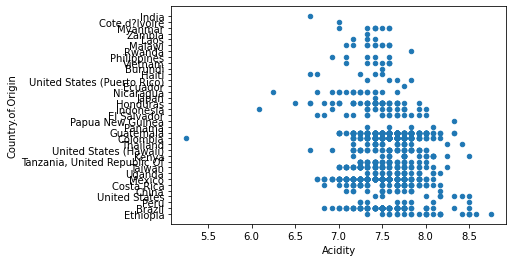

In [ ]:
araica_coffee.plot.scatter(y='Country.of.Origin', x='Acidity')
plt.show()

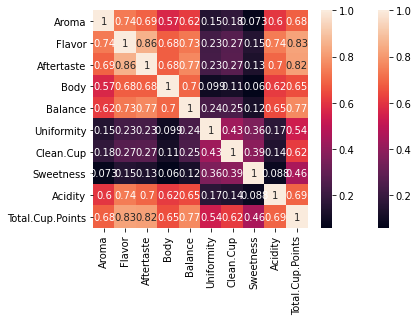

In [ ]:
heat = coffee_score[['Aroma','Flavor','Aftertaste','Body','Balance','Uniformity','Clean.Cup','Sweetness','Acidity','Total.Cup.Points']].corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.show()

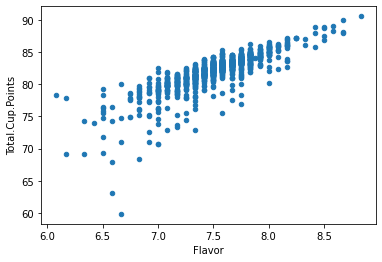

In [ ]:
araica_coffee.plot.scatter(y='Total.Cup.Points', x='Flavor')
plt.show()

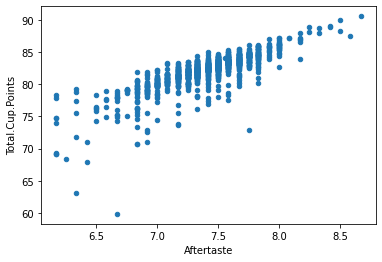

In [ ]:
araica_coffee.plot.scatter(y='Total.Cup.Points', x='Aftertaste')
plt.show()

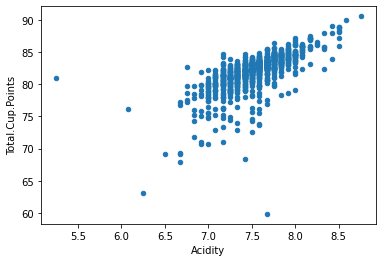

In [ ]:
araica_coffee.plot.scatter(y='Total.Cup.Points', x='Acidity')
plt.show()

As we can see high acidiy can easily lead to higher cup score and also can see that even high cup score country like Ethiopia also high acidity

Let's try predicting cup point using data we have

From acidity describe we seperate range of acidity level to 

In [ ]:
conditions = [
    (araica_coffee['Acidity'] <= 6),
    (araica_coffee['Acidity'] > 6) & (araica_coffee['Acidity'] <= 7),
    (araica_coffee['Acidity'] > 7) & (araica_coffee['Acidity'] <= 8),
    (araica_coffee['Acidity'] > 8)
    ]

In [ ]:
values = [1, 2, 3, 4]

In [ ]:
araica_coffee['acidity_tier'] = np.select(conditions, values)

In [ ]:
araica_coffee['Color'].value_counts()

Green           920
Bluish-Green    111
Blue-Green       77
None             51
Name: Color, dtype: int64

In [ ]:
conditions_color = [
    (araica_coffee['Color'] == 'None'),
    (araica_coffee['Color'] == 'Bluish-Green'),
    (araica_coffee['Color'] == 'Blue-Green'),
    (araica_coffee['Color'] == 'Green')
    ]
color_values = [1, 2, 3, 4]

In [ ]:
araica_coffee['color_tier'] = np.select(conditions_color, color_values)

In [ ]:
araica_coffee['Processing.Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

In [ ]:
conditions_processing = [
    (araica_coffee['Processing.Method'] == 'Washed / Wet'),
    (araica_coffee['Processing.Method'] == 'Natural / Dry'),
    (araica_coffee['Processing.Method'] == 'Semi-washed / Semi-pulped'),
    (araica_coffee['Processing.Method'] == 'Other'),
    (araica_coffee['Processing.Method'] == 'Pulped natural / honey')
    ]
processing_values = [1, 2, 1, 3,2]

In [ ]:
araica_coffee['processing_type'] = np.select(conditions_processing, processing_values)

In [ ]:
focus_data = araica_coffee[['Harvest.Year','altitude_mean_meters','color_tier','processing_type','acidity_tier','Total.Cup.Points']]

In [ ]:
def check_region(country):
  if(country in ['Mexico','Guatemala','Colombia','Brazil','Honduras','Costa Rica','United States (Hawaii)','Nicaragua','El Salvador','United States','Peru','Haiti','United States (Puerto Rico)','Panama','Ecuador']):
    return 1
  if(country in ['Taiwan','Thailand','Indonesia','China','Myanmar','Vietnam','Philippines','Laos','Japan','Papua New Guinea','India']):
    return 2
  if(country in ['Tanzania, United Republic Of','Uganda','Ethiopia','Kenya','Malawi','Rwanda','Zambia','Burundi','Cote d?Ivoire']):
    return 3
  else:
    return 0

In [ ]:
# araica_coffee['region_data'] = check_region(araica_coffee['Country.of.Origin'])
araica_coffee['region_data'] = araica_coffee['Country.of.Origin'].apply(lambda row : check_region(row)) 

In [ ]:
focus_data.head(5)

,Harvest.Year,altitude_mean_meters,color_tier,processing_type,acidity_tier,Total.Cup.Points
0,2014,2075.000000,4,1,4,90.58
1,2014,2075.000000,4,1,4,89.92
3,2014,2000.000000,4,2,4,89.00
4,2014,2075.000000,4,1,4,88.83
5,2013,1813.965837,2,2,4,88.83


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def load_data():
    raw_data = araica_coffee[['region_data','processing_type','Harvest.Year','altitude_mean_meters','color_tier','acidity_tier','Total.Cup.Points']]
    return raw_data

In [ ]:
def extract_feature(df):
    label = df['Total.Cup.Points']
    data = df.drop('Total.Cup.Points', axis=1)
    return data, label

In [ ]:
def split_train_test(df):
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=2020, shuffle=True)
    return train_df, test_df

In [ ]:
def train_model(feat, label):

    # Gradient Boosting
    # model = GradientBoostingRegressor(random_state=2020)

    # Decision Tree
    # model = tree.DecisionTreeRegressor(max_depth=20, random_state=200)

    # Linear Regression
    model = LinearRegression()
    model.fit(feat, label)

    return model

In [ ]:
def rmse(predict, test_label):
    diff = predict - test_label
    return np.sqrt(sum(diff ** 2) / len(diff))

In [ ]:
def run_pipeline():
    # Get data
    raw_data_df = load_data()
    # Clean
    # clean_data_df = clean_data(raw_data_df)

    # Separate Train, Test
    train_df, test_df = split_train_test(raw_data_df)

    # Extract feature
    train_feat, train_label = extract_feature(train_df)
    test_feat, test_label = extract_feature(test_df)

    # Train Model
    model = train_model(train_feat, train_label)

    # Predict Test
    predict = model.predict(test_feat)
    #accuracy = eval_acc(predict, test_label)

    error = rmse(predict, test_label)

    # error_evl = eval_r2(predict, test_label)

    # GradientBoostingRegressor : 19271650.040928077
    # RandomForestRegressor : 8787802.622595124
    # Linear Regression: 26824990.764228985
    # return  train_df.boxplot()
    print(error)
    return model

In [ ]:
use_model = run_pipeline()

2.7781993634178193


In [ ]:
region = 1
processing = 2
year = 2017
attitude = 2000
color = 1
acidity = 1

# 'region_data','processing_type','Harvest.Year','altitude_mean_meters','color_tier','acidity_tier','Total.Cup.Points'
input_df = pd.DataFrame(
{'region_data':[region],'processing_type':[processing],'Harvest.Year':[year],'altitude_mean_meters':[attitude],'color_tier':[color],'acidity_tier':[acidity]})
input_df
predict_data = use_model.predict(input_df)

predict_data[0]

73.25337002792901